In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/jovyan/work/data/wine-reviews/winemag-data_first150k.csv', index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


<AxesSubplot:xlabel='points', ylabel='price'>

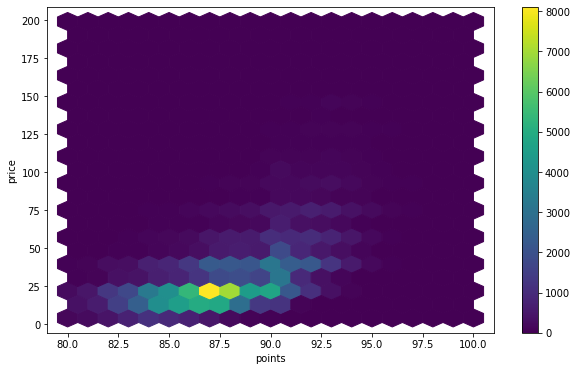

In [13]:
df[df.price < 200].plot.hexbin(x='points', y='price', reduce_C_function=np.sum, cmap='viridis', figsize=(10, 6), gridsize=20, sharex=False)

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn import metrics

In [15]:
df_price_points = df[df.price < 750].sample(1000)[['price', 'points']].dropna()

# selecting and separating label and values
X = df_price_points['price'].values.reshape(-1,1)
y = df_price_points['points'].values.reshape(-1,1)

# data split to train and val
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
models = {
    'Linear': linear_model.LinearRegression(),
    'Ridge': linear_model.Ridge(),
    'Lasso': linear_model.Lasso(),
    'Logistic': linear_model.LogisticRegression(),
}

Linear
MAE: 2.2556552537956573, MSE: 8.087459284218745, R2: 2.843845861543615


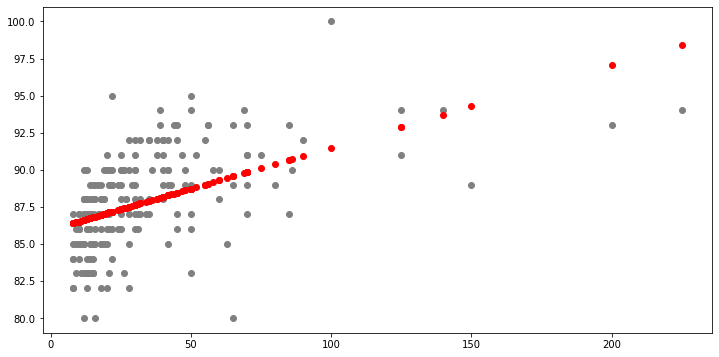

Ridge
MAE: 2.2556553333762404, MSE: 8.087459458666574, R2: 2.8438458922147265


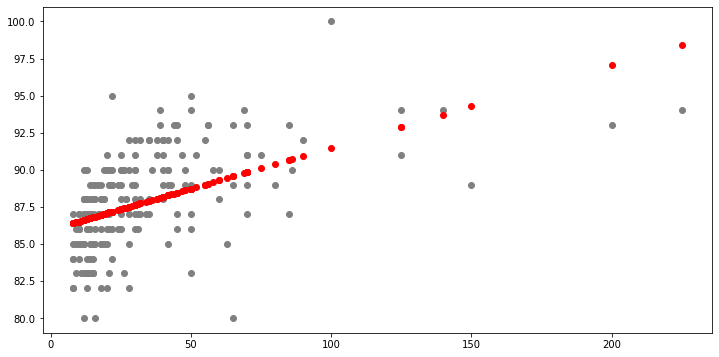

Lasso
MAE: 2.2570288798877733, MSE: 8.09100418578069, R2: 2.844469051647546


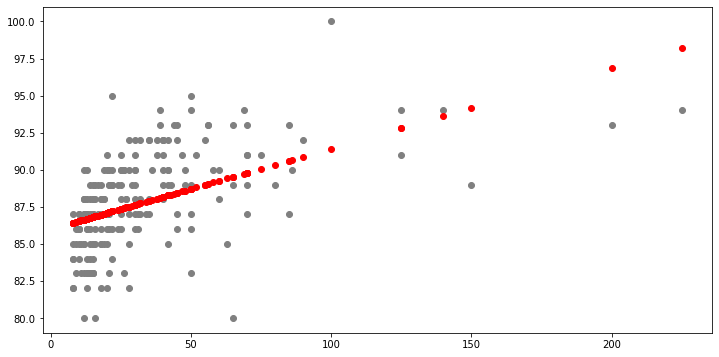

Logistic


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MAE: 2.32, MSE: 8.97, R2: 2.9949958263743874


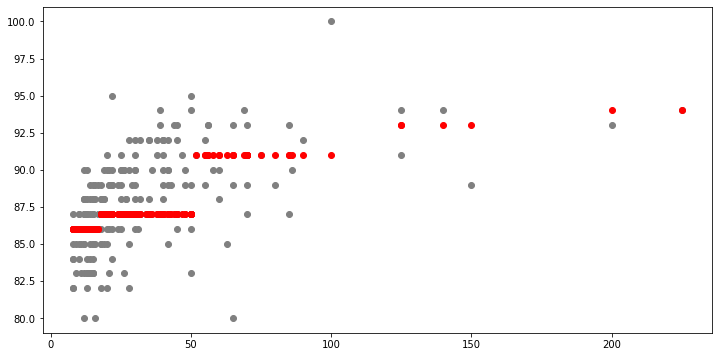

In [17]:
# Train the model using the training sets
#regr.fit(X_train, y_train)
for model_name, regressor in models.items():
    print(model_name)
    regressor.fit(X_train, y_train)
    #To retrieve the intercept:
    #print(regr.intercept_)
    #For retrieving the slope:
    #print(regr.coef_)
    
    y_pred = regressor.predict(X_test)
    df_result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

    
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}, MSE: {metrics.mean_squared_error(y_test, y_pred)}, R2: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    
    plt.figure(figsize=(12,6))
    plt.scatter(X_test, y_test,  color='gray')
    plt.scatter(X_test, y_pred, color='red')
    plt.show()

<AxesSubplot:>

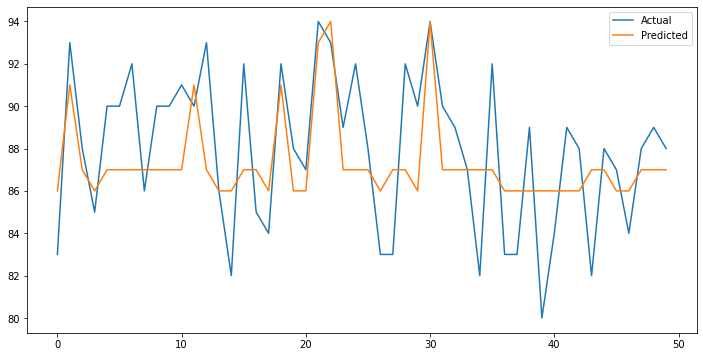

In [18]:
df_result.head(50).plot(figsize=(12,6))